In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.drop(df[df.TotalCharges == " "].index,inplace=True)

In [7]:
df.TotalCharges = df.TotalCharges.astype('float')

In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

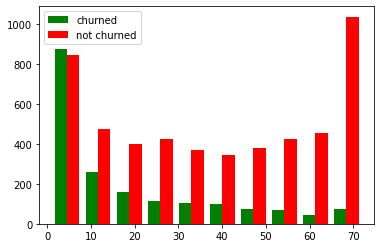

In [8]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churned','not churned'])
plt.legend()


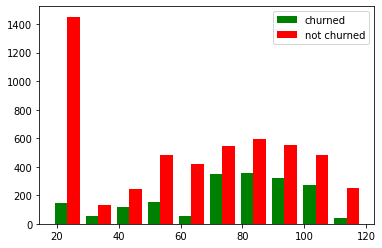

In [9]:
monthly_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.hist([monthly_churn_yes,monthly_churn_no],color=['green','red'],label=['churned','not churned'])
plt.legend()


In [41]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [15]:
for col in df:
    if df[col].dtypes == 'object':
        print(f'{col} : {df[col].unique()}')

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [11]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [12]:
df.replace({'Yes':1,'No':0},inplace=True)

In [13]:
df.replace({'Male':1,'Female':0},inplace=True)

In [14]:
df2 = pd.get_dummies(data = df,columns=['InternetService','Contract','PaymentMethod'])

In [16]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [46]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [17]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [18]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df2.drop('Churn',axis='columns'),df2['Churn'],test_size=0.2,random_state=5)

In [50]:
X_train.shape

(5625, 26)

In [51]:
X_test.shape

(1407, 26)

In [21]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense( 20,input_shape=(26,) ,activation='relu'),
    keras.layers.Dense( 15 ,activation='relu'),
    keras.layers.Dense( 1 ,activation='sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [22]:
model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7545
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7975
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8018
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8036
Epoch 5/100
113/113 [==============================] - 1s 5ms/step - loss: 0.4152 - accuracy: 0.8059
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8053
Epoch 7/100
113/113 [==============================] - 1s 5ms/step - loss: 0.4110 - accuracy: 0.8075
Epoch 8/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4095 - accuracy: 0.8082
Epoch 9/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4088 - accuracy: 0.8057
Epoch 10/100
113/113 [==============================] - 1s 5ms/step - loss: 0.4074 - accura

In [23]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 8ms/step - loss: 0.4622 - accuracy: 0.7761


[0.462176114320755, 0.7761194109916687]

In [24]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 4ms/step


In [25]:
yp

array([[0.32406232],
       [0.60585105],
       [0.01300084],
       ...,
       [0.6880839 ],
       [0.56896985],
       [0.5966117 ]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.51      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



<AxesSubplot: >

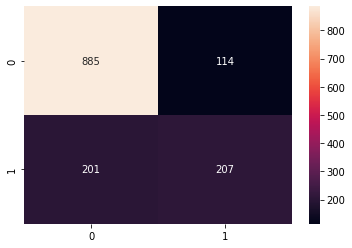

In [29]:
from seaborn import heatmap
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

heatmap(cm,annot=True,fmt='d')

# HANDLING IMBALANCED DATASET

In [30]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,weights=weights)
    print(model.evaluate(X_test,y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification report: \n",classification_report(y_test,y_preds))
    return y_preds        

In [31]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 4s 7ms/step - loss: 0.4926 - accuracy: 0.7543
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4235 - accuracy: 0.7963
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4141 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4119 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4099 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4082 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4067 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4054 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4029 - accura

In [32]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [35]:
count_class_0,count_class_1 = df.Churn.value_counts()
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [36]:
df_class_0.shape

(5163, 27)

In [37]:
df_class_1.shape

(1869, 27)

# method1 - undersample

In [38]:
df_class_0_under = df_class_0.sample(count_class_1)

In [39]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [40]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [41]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)


In [42]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.5522
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7455
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5058 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4986 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.7579
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4908 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4888 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4869 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4849 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4829 - accuracy: 0.7682
Epoch 11/

# METHOD 2 OVERSAMPLING

In [43]:
df_class_1.shape

(1869, 27)

In [45]:
df_class_1.sample(200).shape

(200, 27)

In [46]:
df_class_1.sample(2000).shape

ValueError: Cannot take a larger sample than population when 'replace=False'

In [47]:
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [53]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over =pd.concat([df_class_0,df_class_1_over],axis=0)

In [54]:
df_test_over.shape

(10326, 27)

In [56]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)


In [58]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [59]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 3s 5ms/step - loss: 0.5786 - accuracy: 0.6962
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4869 - accuracy: 0.7660
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4789 - accuracy: 0.7686
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.7725
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4714 - accuracy: 0.7747
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4684 - accuracy: 0.7732
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4668 - accuracy: 0.7753
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4629 - accuracy: 0.7771
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4595 - accuracy: 0.7817
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4563 - accura

# method 3 :SMOTE

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [61]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [64]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [66]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [67]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [68]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5398 - accuracy: 0.7282
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4703 - accuracy: 0.7720
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4589 - accuracy: 0.7785
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4521 - accuracy: 0.7856
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4460 - accuracy: 0.7923
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4411 - accuracy: 0.7936
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4367 - accuracy: 0.7936
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4328 - accuracy: 0.7996
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4304 - accuracy: 0.7996
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4263 - accura

## method 4 ensemble with undersampling

In [70]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [71]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [85]:
4140/3

1380.0

In [86]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [88]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [89]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [90]:
# from sklearn.ensemble import
def get_train_batch(df_majority,df_minority,start,end) :
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    # df_train.shape
    X = df_train.drop('Churn',axis='columns')
    y = df_train.Churn
    return X,y

In [92]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)

In [93]:
X_train.shape

(2990, 26)

In [94]:
y_pred1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6106 - accuracy: 0.6873
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7716
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7756
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7773
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7746
Epoch 11/

In [95]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6677 - accuracy: 0.6033
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7375
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7495
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7699
Epoch 11/

In [96]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5939 - accuracy: 0.7101
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7583
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7628
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7677
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7765
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7750
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7848
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7886
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7822
Epoch 11/

In [97]:
vote1 = 0
vote2 = 0
vote3 = 1 

vote1+vote3+vote2

1

In [99]:
len(y_pred),len(y_pred1),len(y_pred2),len(y_pred3)

(1407, 1407, 1407, 1407)

In [100]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i]=0

In [101]:
y_pred_final

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [102]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.68      0.57       374

    accuracy                           0.73      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.77      0.73      0.74      1407

